# Fundamentals of Data Analysis
## Tasks

These are my solutions to the problems for the Fundamentals of Data Analysis 2020 Task assignment.

For each task, you will find the problem statement, followed directly by my final program. Below this you will find a detailed outline of my approach, which will walk you through how I got to that final program, and what resources I have used.

* [Task 1](#task1)
* [Task 2](#task2)

<a id='task1'></a>
# Task 1

## Problem
Write a Python function called counts that takes a list as input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values. So, the input ['A', 'A', 'B', 'C', 'A'] should have output {'A': 3, 'B': 1, 'C': 1} . Your code should not depend on any module from the standard library or otherwise. You should research the task first and include a description with references of your algorithm in the notebook.

## Answer
----

In [1]:
def counts(items):
    '''Takes a list as input, and produces a dictionary containing the unique contents of the list, 
    and the number of times it appeared in the list'''
    #Create an empty dictionary to store the results.
    results = {}
    
    #Defining a function to check if the next item is a list.
    def count_list(item):
        '''Checks if the list item is itself a list. 
        If it is a list, it will check if the next item of that list is itself a list.
        It will keep doing this until it finds an element that is not a list.
        A this point it will call count_item on that element.'''
        for sub_item in item:
            #If the sub item is itself a list, it will call count_list again. 
            #This means no matter how many nested lists there are, it will iterate through all them.
            if type(sub_item) == list: 
                count_list(sub_item)
            #If the subitem is not a list, then it'll just run the count_item function defined below.
            else:
                count_item(sub_item)
    
    #Because count_list iterates through a list, it'll throw an error if it were to encounter an uniterable object
    #For example, a string. Therefore I need a second inner function specifically for uniterable objects.
    #These will be the dictionary keys.
    def count_item(item):
        '''Checks if the list item already exists as a dictionary key. If it does, it will add 1 to its value.
        If it does not exist as a dictionary key, it will create a new key for that item, and set the value to 1'''
        if item in results:
            results[item] += 1 
        else:
            results[item] = 1
    
    #Finally, this FOR loop will go through the initial list (the items parameter). 
    #If the item within the list is itself a list, That item will go through the count_list inner function. 
    #Otherwise it goes through count_item.
    for item in items:
        if type(item) == list: 
            count_list(item)
        else:
             count_item(item)
        
    return results            

In [2]:
test = ['A', 'A', 'B', 'C', 'A']
counts(test)

{'A': 3, 'B': 1, 'C': 1}

## Approach
----
### Checking for Dictionary keys

As the program must return a dictionary of the unique items in the list, alongside how frequently they appear as value, we must first ensure we know how to iterate over a dictionary's keys. This will allow us to check if a list item already exists as a key, and so our program can take the necessary next step; create a new key for the new item, or update the value for the existing key if it is a duplicate item.

This can be done by using a Dictionary Membership Test[6], which will return a boolean (True or False) depending on whether or not the variable already exists in the dictionary. The syntax for a dictionary membership test is simply:
```
variable in dictionary
```
or alternatively you can check if a key does not already exist in the dictionary by using:
```
variable not in dictionary
```
With this membership test, we can then use a straightforward If/Else statement to determine whether or not a new key must be created, or if an existing key needs its value altered[2][3]:
```
if variable in dictionary:
    dictionary[variable] += 1
else:
    dictionary[variable] = 1
```
This gives us a fairly straightforward initial solution:

In [3]:
# Define the test list, as offered in the problem.
test = ['A', 'A', 'B', 'C', 'A']

In [54]:
def counts(items):
    '''Takes a list as input, and produces a dictionary containing the unique contents of the list, 
    and the number of times it appeared in the list'''
    
    #Create an empty dictionary to store the results.
    results = {}
    
    #Iterate over the list items, and see if a key already exists.
    for item in items:
        if item in results:
            results[item] += 1 
        else:
            results[item] = 1
    #Return the completed dictionary.
    return results       

In [5]:
counts(test)

{'A': 3, 'B': 1, 'C': 1}

### Nested lists and how to deal with them

While the example list included in the problem statement doesn't contain any nested lists, they are something that the program might encounter in the real world. Therefore it's important to find a solution for this now, and one that will ideally scale with the program.

As lists are a hashable data type (i.e. they can altered), they cannot be used as a dictionary key, as outlined in the Python Data Structure documentation[4]:

```Unlike sequences, which are indexed by a range of numbers, dictionaries are indexed by keys, which can be any immutable type; strings and numbers can always be keys. Tuples can be used as keys if they contain only strings, numbers, or tuples; if a tuple contains any mutable object either directly or indirectly, it cannot be used as a key. You can’t use lists as keys, since lists can be modified in place using index assignments, slice assignments, or methods like append() and extend().```

This therefore opens up two potential solutions - change the nested list to a tuple, or find a way to iterate over the nest lists.

#### Converting a nested list into a tuple

Converting the inner list into a tuple, and using that as the key is a straightforward solution. The FOR loop would just need to check the type of the next item it's iterating through, and if it's a list, convert that item to a tuple:
```
if type(list[item]) == list:
    item = tuple(item)
```
However, this would encounter an issue if there's yet another list within this second layer of lists. The Python Data Structure[4] documentation explicitly says that if the "tuple contains a mutable object" (in this case a list) "either directly or indirectly, it cannot be used as a key". Therefore the additional nested listed will prevent this solution from working in all situations. Alongside this, tuples as keys might not be the ideal real world solution anyway, as it opens up the possibility of lengthy dictionary keys that may not serve much purpose for analysis. 

If we were to follow this path, it would look something like this: 

In [55]:
#If I were to follow path 1, this is how it would look.
def counts(items):
    '''Takes a list as input, and produces a dictionary containing the unique contents of the list, 
    and the number of times it appeared in the list'''
    
    #Create an empty dictionary to store the results.
    results = {}
    
    #Turning the list into a tuple lets us add it as a dictionary key.
    #We would need to check that the item is a list before we go through the dictionary keys.
    for item in items:
        if type(item) == list: #check if the next item is a list.
            item = tuple(item) #if so, change it to be a tuple.
        else:
            pass
        
        #Once any lists are changed to tuples, we can see if they already exist in the dictionary keys.
        if item in results.keys():
            results[item] += 1 
        else:
            results[item] = 1 
   
    #Return the completed dictionary.
    return results        

In [7]:
# Create a list containing a list to test this approach.
bigtest = [1, 5, 17, 82, 91, 'horse', 'cow', 'cheese', 47.7777, 1, 1, 1, 1, 1, 5, 17, 1, 82, 91, 'horse',
           'cow', 'cheese', 15, 81, 'cheese', ['another', 'list', 'in', 'the', 'list', 77]]

counts(bigtest)

{1: 7,
 5: 2,
 17: 2,
 82: 2,
 91: 2,
 'horse': 2,
 'cow': 2,
 'cheese': 3,
 47.7777: 1,
 15: 1,
 81: 1,
 ('another', 'list', 'in', 'the', 'list', 77): 1}

In [8]:
# If there is yet another level of lists, really receive an error: "TypeError: unhashable type: 'list'"

lists_in_lists = [1, 2, 3, [1, 2, 3, 27.124, [1, 2, 3, 'hi', [[1,[1, 'hello'], 2, 3], 1, 2, 3]]]]

counts(lists_in_lists)

TypeError: unhashable type: 'list'

#### Iterating over nested lists.

A more scalable and potentially useful solution is to iterate over any nested lists too. This will involve checking the data type of the next list item, and if it is a list, running the FOR loop again. This seems to be the most likely solution, as it will allow the program to count every individual item in every list. A program that can unpack nested lists could be used for counting the frequency of words in files or when scraping websites, and so has a real world use case. I am therefore interpreting this as the desired outcome for this problem.

However in order to do this, I must find a way to repeat the FOR loop as many times as necessary, ideally without having to repeat my code over and over again. 

### Nested Functions and DRY[7]

If I were to rely solely on FOR loops, I would require a loop for every level of nested list. As I do not know what lists this program will be used for, I therefore cannot estimate how many I would need. Should I include a dozen nested for loops? Will that cover every necessity? 

Obviously in such a situation my code would be unnecessarily repetitive in most scenarios, and not repetitive enough in others. I had to find a way to reuse my original FOR loop for updating the dictionary keys, without having to repeat that code endlessly, and fortunately Python has just the tool I need - nested functions[5]. This will ensure that my code is DRY - Don't Repeat Yourself[7].

By defining my initial FOR loop as a nested function, I will be able call it as many times as I need without having to repeat those 5 lines of code each time. Better yet, as this function is nested within the Counts function, it can make use of the same input parameters as were provided when the Counts function was called. Similarly, if I am using a nested function for the dictionary keys FOR loop, I could also use one for the FOR loop which checks if the next list item is of list type itself.


In [58]:
def counts(items):
    '''Takes a list as input, and produces a dictionary containing the unique contents of the list, 
    and the number of times it appeared in the list'''
    #Create an empty dictionary to store the results.
    results = {}
    
    #Defining a function to check if the next item is a list.
    def count_list(item):
        '''Checks if the list item is itself a list. 
        If it is a list, it will check if the next item of that list is itself a list.
        It will keep doing this until it finds an element that is not a list.
        A this point it will call count_item on that element.'''
        for sub_item in item:
            #If the sub item is itself a list, it will call count_list again. 
            #This means no matter how many nested lists there are, it will iterate through all them.
            if type(sub_item) == list: 
                count_list(sub_item)
            #If the subitem is not a list, then it'll just run the count_item function defined below.
            else:
                count_item(sub_item)
    
    #Because count_list iterates through a list, it'll throw an error if it were to encounter an uniterable object
    #For example, a string. Therefore I need a second inner function specifically for uniterable objects.
    #These will be the dictionary keys.
    def count_item(item):
        '''Checks if the list item already exists as a dictionary key. If it does, it will add 1 to its value.
        If it does not exist as a dictionary key, it will create a new key for that item, and set the value to 1'''
        if item in results:
            results[item] += 1 
        else:
            results[item] = 1
    
    #Finally, this FOR loop will go through the initial list (the items parameter). 
    #If the item within the list is itself a list, That item will go through the count_list inner function. 
    #Otherwise it goes through count_item.
    for item in items:
        if type(item) == list: 
            count_list(item)
        else:
             count_item(item)
        
    return results            

In [10]:
#This version will now work with lists nested at multiple levels.
counts(lists_in_lists)

{1: 6, 2: 5, 3: 5, 27.124: 1, 'hi': 1, 'hello': 1}

### Other considerations

The above function does what is requested within the problem statement, and will work no matter what list is provided. That said, there are potentially other additions that can be included in the answer for this. For example, how should this program deal with strings that contain the same letters, but different combinations of capitalized letters?

For example, let's say our list contains two strings (among many): 
* "DRY" (the above mentioned "Don't Repeat Yourself" acronym), 
* "dry" (to mean lacking moisture)

If I wish for my program to count the frequency of combinations of letters, then I would want these two to be treated exactly the same, and so they should both contribute to the same count. 

However, if I am looking to capture the content and meaning of the strings in the list, then I would want them to be counted separately, and perhaps later combine their totals if it made sense.

The program above would follow the first of these approaches - treating these two words as fundamentally different, and therefore each having its own count. However, if we did wish to treat the two words as being the same, we could add an IF statement as the first step in the count_item function. Like so:
```
 def count_item(item):
      
        if type(item) == str:
            item = item.lower()
            
        if item in results:
            results[item] += 1 
        else:
            results[item] = 1
```

In [61]:
def counts(items):
    '''Takes a list as input, and produces a dictionary containing the unique contents of the list, 
    and the number of times it appeared in the list'''
    #Create an empty dictionary to store the results.
    results = {}
    
    #Defining a function to check if the next item is a list.
    def count_list(item):
        '''Checks if the list item is itself a list. 
        If it is a list, it will check if the next item of that list is itself a list.
        It will keep doing this until it finds an element that is not a list.
        A this point it will call count_item on that element.'''
        for sub_item in item:
            #If the sub item is itself a list, it will call count_list again. 
            #This means no matter how many nested lists there are, it will iterate through all them.
            if type(sub_item) == list: 
                count_list(sub_item)
            #If the subitem is not a list, then it'll just run the count_item function defined below.
            else:
                count_item(sub_item)
    
    #Because count_list iterates through a list, it'll throw an error if it were to encounter an uniterable object
    #For example, a string. Therefore I need a second inner function specifically for uniterable objects.
    #These will be the dictionary keys.
    def count_item(item):
        '''If the list item is a string, it'll convert it to lower case.
        Then checks if the list item already exists as a dictionary key. If it does, it will add 1 to its value.
        If it does not exist as a dictionary key, it will create a new key for that item, and set the value to 1'''
        if type(item) == str:
            item = item.lower()
            
        if item in results:
            results[item] += 1 
        else:
            results[item] = 1
    
    #Finally, this FOR loop will go through the initial list (the items parameter). 
    #If the item within the list is itself a list, That item will go through the count_list inner function. 
    #Otherwise it goes through count_item.
    for item in items:
        if type(item) == list: 
            count_list(item)
        else:
             count_item(item)
        
    return results            

In [12]:
dry_list = ['dry', 'DRY', ['dry', 'DrY', 'DRY']]

counts(dry_list)

{'dry': 5}

Similar to this, we could also use the strip() method on any strings to remove trailing spaces.

As my interpretation of the problem is to treat these two variations, "dry" and "DRY" as being unique, I have not included this additional IF statement in my final answer (found at the top).

## References
<p>Example</p>
<p>[1] Real Python; How to Iterate Through a Dictionary in Python; https://realpython.com/iterate-through-dictionary-python/</p>
<p>[2] Career Karma; Python Add to Dictionary: A Guide; https://careerkarma.com/blog/python-add-to-dictionary/</p>
<p>[3] Geeks for Geeks; Python | Get specific keys' values; https://www.geeksforgeeks.org/python-get-specific-keys-values/?ref=rp</p>
<p>[4] Python; Data Structures; https://docs.python.org/3/tutorial/datastructures.html#dictionaries</p>
<p>[5] Real Python; Python Inner Functions—What Are They Good For?; https://realpython.com/inner-functions-what-are-they-good-for/ </p>
<p>[6] Programiz; Python Dictionary; https://www.programiz.com/python-programming/dictionary</p>
<p>[7] Wikipedia; Don't repeat yourself; https://en.wikipedia.org/wiki/Don%27t_repeat_yourself
    
_____

<a id='task2'></a>

# Task 2

## Problem
Write a Python function called dicerolls that simulates rolling dice. Your function should take two parameters: the number of dice k and the number of times to roll the dice n. The function should simulate randomly rolling k dice n times, keeping track of each total face value. It should then return a dictionary with the number of times each possible total face value occurred. So, calling the function as diceroll(k=2, n=1000) should return a dictionary like:
```
{2:19,3:50,4:82,5:112,6:135,7:174,8:133,9:114,10:75,11:70,12:36} 
```
You can use any module from the Python standard library you wish and you should include a description with references of your algorithm in the notebook.

## Answer
-----

In [50]:
import itertools
import random

def diceroll(k, n):
    '''Counts the total face value of "k" dice rolled, repeated "n" times.'''
    #Creating dictionary keys for all possible results first, as smaller samples might not see a particular combination rolled.
    dice_results = {}
    
    #Using itertools.product to create every possible dictionary key for "k" dice.
    for dice in itertools.product(range(1, 7), repeat=k):
        combination_total = sum(dice)            
        if combination_total not in dice_results.keys():
            dice_results[combination_total] = 0 
    
    #Uses random.randrange to roll "k" dice, sum the total and add 1 to the corresponding dictionary key.
    #Repeated "n" times
    for i in range(n):
        total = 0
        for j in range(k):
            total += random.randrange(1,7)
        dice_results[total] += 1 

    #Returns the completed dictionary one one line.    
    return print(dice_results)

In [51]:
diceroll(k=2, n=1000)

{2: 24, 3: 51, 4: 71, 5: 122, 6: 169, 7: 149, 8: 127, 9: 114, 10: 84, 11: 55, 12: 34}


## Approach

### Simulating rolling a die

The first step to solving this problem is working out how to simulate rolling a die, i.e. picking a random number from 1-6, with each number having an equal chance of being picked. To do this, I will need a pseudorandom number generator, and as has been shown in other assignments and lectures this semester, Numpy.Random would help me here. However, Numpy is not part of the Python Standard Library[1], and so I will have to utilise the Random module. Within the Random module, there is the "randrange" function, which will return an integer value. The syntax for this function is as follows[2]:
```
random.randrange(start, stop[, step])
```
In this case, I will set the "start" value to 1, the "stop" value to 7 (as it is not inclusive), and will not enter a "step" value. This gives me a function that will randomly pick a number from 1-6, and will act as my die for this problem.

In [16]:
#Simulating rolling 1 die.
random.randrange(1,7)

2

### Rolling multiple dice and saving the totals

#### Rolling multiple dice

Now that I've successfully simulated rolling one die, I must now replicate that function for each dice that must be rolled. Since the user will be able to specify the number of dice (via the "k" parameter), I will need to ensure that the solution scales for any value entered a "k".

For this, I can make use of the range function[5] with a FOR loop. For example

```
for i in range(k):
    random.randrange(1,7)
```
    
This will mean that regardless of what figure is entered a "k", a dice will be rolled that many times. This is because the range function creates a range object "k" amount of elements, and the FOR loop will iterate through each. For example, if "k" is set to 4, range(4) will create a range object with 4 elements, and thus the FOR loop will run 4 times. When this is combined with the use of randrange(1,7), it'll simulate the rolling of 4 dice.

### Saving the totals

Now that we have multiple dice being rolled, we must save the total so that we can use it as a dictionary key. In the Geek For Geeks article regarding the range function[5] they include the below example.

In [17]:
# performing sum of natural 
# number 
sum = 0
for i in range(1, 11): 
    sum = sum + i 
print("Sum of first 10 natural number :", sum) 

Sum of first 10 natural number : 55


This shows that I can set a variable outside of the FOR loop, and add the generated number to that variable each time. This would give me the total value of the dice rolls. For example:

In [18]:
def diceroll(k):
    #Creating the "total" variable which will have the value of each die roll added to it.
    total = 0

    #Rolling "k" die
    for i in range(k):
        #Roll a die, and add its value to the "total" variable.
        total += random.randrange(1,7)

    #Returns the completed dictionary.    
    return total

In [19]:
diceroll(2)

3

I can then combine this with the IF/ELSE statement I used for Problem 1. This will check if the total dice roll is an existing dictionary key. If so, it will increase the count by 1, otherwise it will create a new dictionary key and set the value to 1.

In [39]:
def diceroll(k):

    #Creating the dictionary to store the totals and their frequency.
    dice_results = {}

    #Creating the "total" variable which will have the value of each die roll added to it.
    total = 0

    #Rolling "k" die
    for i in range(k):
        #Roll a die, and add its value to the "total" variable.
        total += random.randrange(1,7)

    #Checks if the total already exists as a dictionary key. If so, add 1, if not, create it and set value to 0.
    if total in dice_results:
        dice_results[total] += 1 
    else:
        dice_results[total] = 1

    #Returns the completed dictionary.    
    return dice_results

In [40]:
diceroll(k=3)

{7: 1}

### Rolling the dice multiple times

Now that I have the dice rolls being summed, and the totals being added as a dictionary key, I just need to repeat the rolling of the dice.

For this, I can once again utilise the range function, with the user specified "n" as the parameter. This will act just like the number of dice rolled (k). As I want each roll of the dice to have a separate title, I must reset the "total" variable for each roll.

In [41]:
def diceroll(k,n):

    #Creating the dictionary to store the totals and their frequency.
    dice_results = {}

    #Rolling the dice "n" times
    for i in range(n):

        #Creating the "total" variable which will have the value of each die roll added to it.
        total = 0

        #Rolling "k" die
        for j in range(k):
            #Roll a die, and add its value to the "total" variable.
            total += random.randrange(1,7)

        #Checks if the total already exists as a dictionary key. If so, add 1, if not, create it and set value to 0.
        if total in dice_results:
            dice_results[total] += 1 
        else:
            dice_results[total] = 1

    #Returns the completed dictionary.    
    return dice_results

In [43]:
diceroll(k=2, n=1000)

{8: 138,
 10: 78,
 11: 47,
 9: 114,
 3: 49,
 7: 170,
 5: 116,
 6: 133,
 2: 32,
 4: 89,
 12: 34}

### Ensuring all possible totals appear as keys

When "n" is set to a high number (e.g. the 1000 given in the problem statement), it's expected that all of the possible outcomes will be rolled. This would mean that the dictionary keys include all possible variations and the amount of times it appeared. However, for smaller sample sizes (for example is n=5), there will be possible totals that do not appear. My interpretation of the problem is that in this scenario, the possible total should still exist as a dictionary key, but with the value set to 0.

In order to do this, I will first need to get all of the possible totals from "k" dice. I was able to find a Stack Overflow question similar to this scenario, which pointed me towards the itertools module[3]. As this module is included in the Python Standard Library[1], I can still use it for this problem.

By using the itertools.product function, with range(1,7) and repeat=k as the parameters, I can generate every combination of "k" dice. I can then sum those combinations to give me every possible total:
```
for dice in itertools.product(range(1, 7), repeat=k):
        combination = sum(dice)            
```
I can then use an IF statement to check that that combination's total does not exist as a dictionary key. If the combination's total isn't already a dictionary key, the IF statement will create a new dictionary key for that total with 0 as it's value, otherwise it will skip over it. This is because there's multiple ways to make some of the possible totals (e.g. with 2 dice, there's 6 possible ways to make a total of 7), but I only need 1 of each total as a dictionary key.

In [46]:
import itertools

def diceroll(k):

    #Creating the dictionary to store all of the possible totals.
    dice_results = {}
 
    #Generates every possible combination of "k" sets of 1-6.
    for dice in itertools.product(range(1, 7), repeat=k):
        
        #Sums each of the generated combinations.
        combination_total = sum(dice)            
        
        #If the combination total is not a dictionary key already, it will create one with 0 as the value.
        if combination_total not in dice_results.keys():
            dice_results[combination_total] = 0         
    
    #Returns the completed dictionary of possible totals.
    return dice_results

In [47]:
diceroll(k=3)

{3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0}

I can now combine this dictionary creation step with my previous FOR loops in order to count their frequency. As I now have every possible combination as a dictionary key already, I can now remove the IF/ELSE statement within the FOR loop.

In [48]:
import itertools
import random

def diceroll(k, n):

    #Creating the dictionary to store all of the possible totals.
    dice_results = {}

    #Using itertools.product to create every possible dictionary key for "k" dice.
    for dice in itertools.product(range(1, 7), repeat=k):
        combination_total = sum(dice)            
        if combination_total not in dice_results.keys():
            dice_results[combination_total] = 0 
    
    #Uses random.randrange to roll "k" dice, sum the total and add 1 to the corresponding dictionary key.
    #Repeated "n" times
    for i in range(n):
        total = 0
        for j in range(k):
            total += random.randrange(1,7)
        dice_results[total] += 1 
    
    #Returns the completed dictionary
    return dice_results

In [49]:
diceroll(k=2, n=1000)

{2: 29,
 3: 62,
 4: 85,
 5: 121,
 6: 130,
 7: 154,
 8: 142,
 9: 119,
 10: 73,
 11: 56,
 12: 29}

Finally, as the problem statement states that the dictionary should be returned on one line, I can use the print function on the dice_results dictionary.

In [52]:
import itertools
import random

def diceroll(k, n):

    #Creating the dictionary to store all of the possible totals.
    dice_results = {}

    #Using itertools.product to create every possible dictionary key for "k" dice.
    for dice in itertools.product(range(1, 7), repeat=k):
        combination_total = sum(dice)            
        if combination_total not in dice_results.keys():
            dice_results[combination_total] = 0 
    
    #Uses random.randrange to roll "k" dice, sum the total and add 1 to the corresponding dictionary key.
    #Repeated "n" times
    for i in range(n):
        total = 0
        for j in range(k):
            total += random.randrange(1,7)
        dice_results[total] += 1 
    
    #Returns the completed dictionary on one line.
    return print(dice_results)

In [53]:
diceroll(k=2, n=1000)

{2: 23, 3: 67, 4: 81, 5: 115, 6: 120, 7: 191, 8: 127, 9: 113, 10: 82, 11: 57, 12: 24}


## References

<p>[1] Python; The Python Standard Library; https://docs.python.org/3/library/</p>
<p>[2] Python; random - Generate pseudo-random numbers; https://docs.python.org/3/library/random.html</p>
<p>[3] Stack Overflow; python itertools: How to roll N dice?;
https://stackoverflow.com/questions/39400257/python-itertools-how-to-roll-n-dice</p>
<p>[4] Python; itertools — Functions creating iterators for efficient looping; https://docs.python.org/3/library/itertools.html</p>
<p>[5] Geeks for Geeks; Python range() function; https://www.geeksforgeeks.org/python-range-function/</p>

______

# Task 3

The numpy.random.binomial function can be used to simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a coin is flipped many times then the number of heads is well approximated by a bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively low, and the chances of getting any other number of heads decreases as you move away from 50 in either direction towards 0 or 100. Write some python code that simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track of the number of heads in each of the 1,000 simulations. Select an appropriate plot to depict the resulting list of 1,000 numbers, showing that it roughly follows a bell-shaped curve. You should explain your work in a Markdown cell above the code.

Notes:

I'm assuming we're not supposed to use numpy.random.binomial (requested clarification on this).

Therefore I'll need to simulate a coin toss - the random module can help here. random.randrange(0,2).

I'll then need to repeat this 100 times, keeping track of the number of heads that are rolled. If I assume heads is a "1" is can simply sum the number of 1s in the 100 rolls.

I then need to repeat this 1000 times, keeping track of the results from each of the 100 rolls. The dictionary work we've been doing in the prior tasks will help here.

I'll then need to plot the results. I initially tried a histogram, but it was counting the number of index items at each value. This meant that 0 heads looked to have dozens of results, when in fact we just had dozens of possible scores not have any records. I'll therefore have to use a bar plot, with the "scores" as the categories, and their count as the y axis values.

<AxesSubplot:>

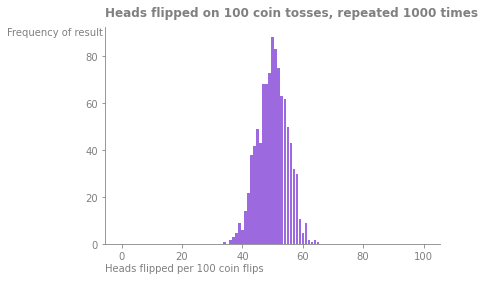

In [112]:
import random
import matplotlib.pyplot as plt
import pandas as pd

def coinflips():
    '''A function that simulates flipping a coin 100 times, and recording the heads, repeated 1000 times.
    Will return a bar plot showing the "scores" each set of 100 flips.'''

    #Creating a dictionary of all possible "scores" from 0-100. 
    #This will ensure the final plots will still show any totals that didn't appear.
    results = {}
    
    #Range goes up to but doesn't include the high value. In this 101 gives 100 results.
    for i in range(101):
        results[i] = 0

    #Repeat the whole process 1000 times.
    for i in range(1000):

        #Create a variable for the heads (1s) to be added to.
        total = 0

        #flip the coin 100 times
        for k in range(100):
            #Add the result of each coinflip to the total (0 for tails, 1 for heads)
            total += random.randrange(0,2)
        #Find the corresponding dictionary key and add 1 to its count.
        results[total] +=1
    
    #Turn this into a dataframe for plotting https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.from_dict.html
    def dictionary_to_dataframe(results):
        coinflips_df = pd.DataFrame.from_dict(results, orient='index', columns = ['Frequency'])
        return coinflips_df
    
    #Histogram isn't working here, as it's not treating the "scores" as categories, I'll therefore use a bar plot.
    def plotting(coinflips_df):
        
        #Stating the colour I will use for text and axes.
        grey = '#808080'
        
        #Creating objects for the plot for easier customisation.
        fig, ax = plt.subplots()
        
        #Plotting results as a bar chart, with each "score" as a category on the x axis, and their count on the y axis.
        ax.bar(coinflips_df.index, coinflips_df['Frequency'], color = '#9C6ADE')
        
        #https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html
        fig.suptitle("Heads flipped on 100 coin tosses, repeated 1000 times", x=0.125, y = 0.95, fontsize = 12, ha='left', color = grey, fontweight = 'bold')
        #Using fig.text for the axis laels as it gives more flexibility.
        fig.text(0.125, 0.03, "Heads flipped per 100 coin flips", ha='left', color = grey)
        fig.text(0.12, 0.85, "Frequency of result", ha='right', color = grey)
        
        #Will edit the spines, so that we can highlight the data in the plot itself.
        #https://stackoverflow.com/questions/925024/how-can-i-remove-the-top-and-right-axis-in-matplotlib
        #https://stackoverflow.com/questions/1982770/matplotlib-changing-the-color-of-an-axis
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_color(grey)
        ax.spines['bottom'].set_color(grey)
        ax.tick_params(axis='both', colors=grey)

        
        return ax
    #I want to pass the results to the dictionary_to_dataframe function, and the results of this passed to the plotting function.
    return plotting(dictionary_to_dataframe(results))

coinflips()

<AxesSubplot:>

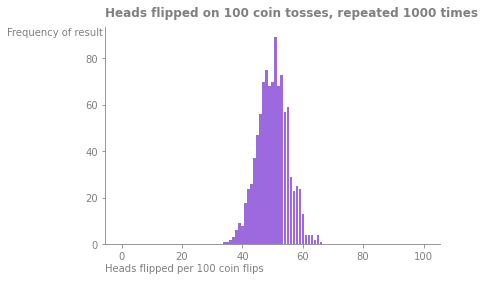

In [109]:
coinflips()